In [1]:
import keras
from keras.datasets import mnist
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model 
import matplotlib.pyplot as plt
import numpy as np
import cv2
#load mnist dataset
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


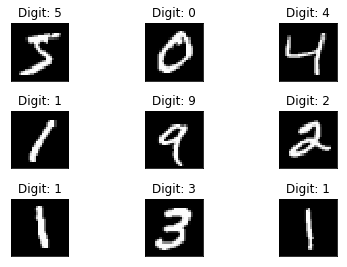

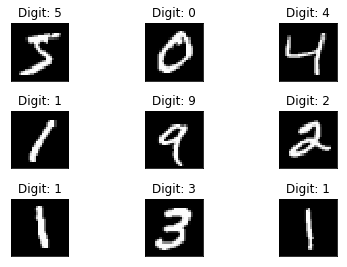

In [2]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(training_images[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(training_labels[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [3]:
#adding the images with white background and black text on it i.e negative of the images of mnist
training_images_neg = 255 - training_images
print(type(training_images_neg))
print(training_images_neg.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)


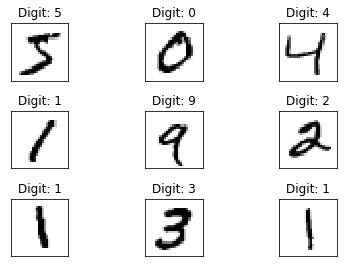

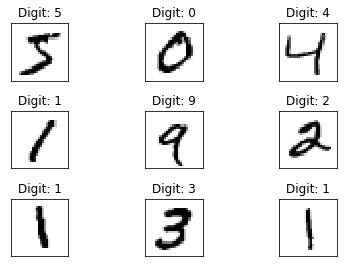

In [4]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(training_images_neg[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(training_labels[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [5]:
#taking negative of the testing data
test_images_neg = 255 - test_images
print(type(test_images_neg))
print(test_images_neg.shape)

<class 'numpy.ndarray'>
(10000, 28, 28)


In [6]:
#concatenating the negative dataset to the origanal dataset
training_images_whole = np.concatenate([training_images,training_images_neg],axis=0)
print(type(training_images_whole))
print(training_images_whole.shape)

<class 'numpy.ndarray'>
(120000, 28, 28)


In [7]:
#concatenating the negative dataset to the testing dataset
test_images_whole = np.concatenate([test_images,test_images_neg],axis=0)
print(type(test_images_whole))
print(test_images_whole.shape)

<class 'numpy.ndarray'>
(20000, 28, 28)


In [8]:
#concatenating the y_train dataset
training_labels_whole = np.concatenate([training_labels,training_labels],axis=0)
print(type(training_labels_whole))
print(training_labels_whole.shape)

#concatenating the y_test dataset
test_labels_whole = np.concatenate([test_labels,test_labels],axis = 0)
print(type(test_labels_whole))
print(test_labels_whole.shape)

<class 'numpy.ndarray'>
(120000,)
<class 'numpy.ndarray'>
(20000,)


6


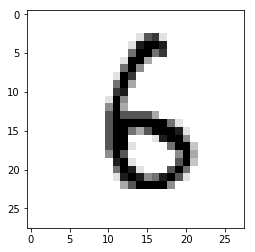

In [9]:
print(test_labels_whole[13000])
plt.imshow(test_images_whole[13000],cmap='gray')

In [10]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            if(logs.get('acc')>=0.998):
                print("\nReached 99.8% accuracy so cancelling training!")
                self.model.stop_training=True
callbacks=myCallback()

In [11]:
training_images_whole=training_images_whole.reshape(120000,28,28,1)
training_images_whole=training_images_whole/255.0
test_images_whole=test_images_whole.reshape(20000,28,28,1)
test_images_whole=test_images_whole/255.0
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256,activation='relu'),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Dense(512,activation='relu'),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Dense(10,activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [12]:
# With data augmentation to prevent overfitting
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1)  # randomly shift images vertically (fraction of total height)

datagen.fit(training_images_whole)

In [14]:
#history = model.fit(training_images_whole,training_labels_whole,epochs=10,callbacks=[callbacks],verbose=1,validation_data=(test_images_whole, test_labels_whole))
history = model.fit(datagen.flow(training_images_whole,training_labels_whole),
                              epochs = 30, callbacks=[callbacks],verbose=1,validation_data=(test_images_whole, test_labels_whole))

  ...
    to  
  ['...']
Train for 3750 steps, validate on 20000 samples
Epoch 1/30
3750/3750 [==============================] - 313s 83ms/step - loss: 0.2904 - acc: 0.9097 - val_loss: 0.0666 - val_acc: 0.9795
Epoch 2/30
3750/3750 [==============================] - 379s 101ms/step - loss: 0.1678 - acc: 0.9509 - val_loss: 0.0526 - val_acc: 0.9843
Epoch 3/30
3750/3750 [==============================] - 352s 94ms/step - loss: 0.1397 - acc: 0.9595 - val_loss: 0.0395 - val_acc: 0.9879
Epoch 4/30
3750/3750 [==============================] - 284s 76ms/step - loss: 0.1245 - acc: 0.9641 - val_loss: 0.0365 - val_acc: 0.9887
Epoch 5/30
3750/3750 [==============================] - 289s 77ms/step - loss: 0.1127 - acc: 0.9678 - val_loss: 0.0407 - val_acc: 0.9880
Epoch 6/30
3750/3750 [==============================] - 270s 72ms/step - loss: 0.1015 - acc: 0.9704 - val_loss: 0.0327 - val_acc: 0.9904
Epoch 7/30
3750/3750 [==============================] - 270s 72ms/step - loss: 0.0931 - acc: 0.9730 - va

In [15]:
score = model.evaluate(test_images_whole, test_labels_whole, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.02000925881244775
Test accuracy: 0.9944


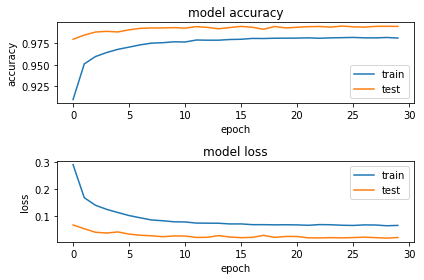

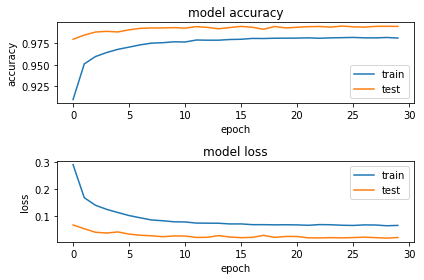

In [16]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig

In [17]:
#Save the model
# serialize model to JSON
digit_recog_model_json = model.to_json()
with open("fulldrmodel.json", "w") as json_file:
    json_file.write(digit_recog_model_json)
# serialize weights to HDF5
model.save_weights("fulldrmodel.h5")
print("Saved model to disk")
#save keras weight
model.save('kfulldrmodeldigit.h5')
#savemodel
model.save('kfulldrmodeldigit')

Saved model to disk
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: kfulldrmodeldigit\assets


# TESTING STARTS

In [18]:
model = tf.keras.models.load_model('kfulldrmodeldigit')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [44]:
img = load_img("2.jpg")
print(type(img))
#now converting the image in form of array
img = img_to_array(img)
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>


(338, 450, 3)


(338, 450)

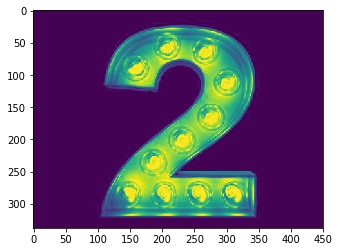

In [45]:
print(img.shape)
# plt.imshow(img.reshape(28,28),cmap='gray')
x=img[:,:,0]
plt.imshow(x)
x.shape
# plt.imshow(x,cmap='gray')

(28, 28)


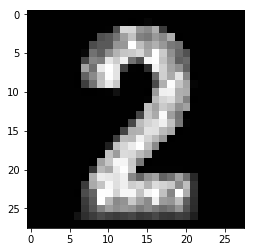

In [46]:
x_con = cv2.resize(x,(28,28))
print(x_con.shape)
plt.imshow(x_con,cmap='gray')

In [47]:
x_con=x_con.reshape((1, 28, 28, 1))
print(x_con.shape)

(1, 28, 28, 1)


In [48]:
p = model.predict_classes(x_con)
print(type(p))
print(p)
print(p[0])

<class 'numpy.ndarray'>
[2]
2


# FULL TESTING
```
here all input images will be converted to black and white so images can be easy to be predicted
```

In [24]:
originalImage = cv2.imread('7.png')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)

(thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('img',blackAndWhiteImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
print(type(blackAndWhiteImage))
print(blackAndWhiteImage.shape)

<class 'numpy.ndarray'>
(1480, 1490)


In [26]:
#resizing the image
blackAndWhiteImage = cv2.resize(blackAndWhiteImage, (28,28), interpolation = cv2.INTER_AREA)
print(type(blackAndWhiteImage))
# print(blackAndWhiteImage)
blackAndWhiteImage=blackAndWhiteImage.reshape((1, 28, 28, 1))
print(blackAndWhiteImage.shape)

<class 'numpy.ndarray'>
(1, 28, 28, 1)


In [27]:
p = model.predict_classes(blackAndWhiteImage)
print(type(p))
print(p)
print(p[0])

<class 'numpy.ndarray'>
[7]
7
